In [1]:
import pandas as pd
df = pd.read_csv('release_group_tagcount_firstyear.csv')

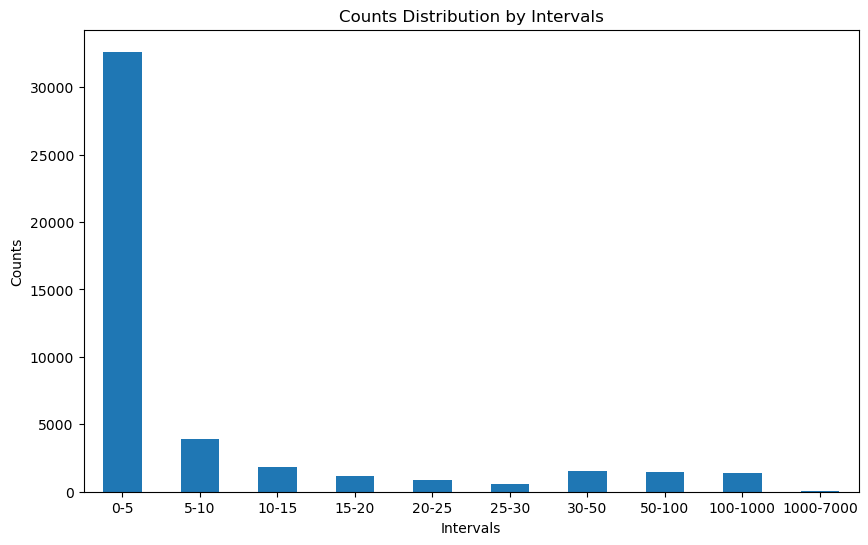

In [2]:
import matplotlib.pyplot as plt

# 假设counts列的名字是'count'  
counts_column = 'count'  

# 定义区间边界  
bins = [0, 5, 10, 15, 20, 25, 30, 50, 100, 1000, 7000]  # 注意：最后一个边界应比最大度数稍大，以确保所有度数都被包含  
  
# 使用pandas的cut函数将counts分成区间  
interval_labels = pd.cut(df[counts_column], bins=bins, labels=['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-50', '50-100', '100-1000','1000-7000'])  
  
# 统计每个区间的数量  
interval_counts = interval_labels.value_counts(sort=False)  
  
# 绘制直方图  
plt.figure(figsize=(10, 6))  # 设置图形大小  
interval_counts.plot(kind='bar')  
plt.xlabel('Intervals')  # 设置x轴标签  
plt.ylabel('Counts')  # 设置y轴标签  
plt.title('Counts Distribution by Intervals')  # 设置图形标题  
plt.xticks(rotation=0)  # 设置x轴刻度标签的旋转角度  
plt.show()  # 显示图形

In [3]:
# 读取CSV文件  
file_path = 'release_group_tagcount_firstyear.csv'  # 替换为你的文件路径  
df = pd.read_csv(file_path)  
  
for year in range(2000, 2024):
    year_df = df[df['first_release_year'] == year]
    globals()[f'year_{year}_df'] = year_df
 

    pop_music_df = year_df[year_df['name'].str.contains('pop', case=False)]
    globals()[f'pop_music_{year}_df'] = pop_music_df   
    total_pop_songs = pop_music_df['count'].sum()
    globals()[f'total_pop_{year}_df'] = total_pop_songs

    
    rock_music_df = year_df[year_df['name'].str.contains('rock', case=False)]
    globals()[f'rock_music_{year}_df'] = rock_music_df    
    total_rock_songs = rock_music_df['count'].sum()
    globals()[f'total_rock_{year}_df'] = total_rock_songs

    
    jazz_music_df = year_df[year_df['name'].str.contains('jazz', case=False)]
    globals()[f'jazz_music_{year}_df'] = jazz_music_df    
    total_jazz_songs = jazz_music_df['count'].sum()
    globals()[f'total_jazz_{year}_df'] = total_jazz_songs

    
    metal_music_df = year_df[year_df['name'].str.contains('metal', case=False)]
    globals()[f'metal_music_{year}_df'] = metal_music_df    
    total_metal_songs = metal_music_df['count'].sum()
    globals()[f'total_metal_{year}_df'] = total_metal_songs

    
    electronic_music_df = year_df[year_df['name'].str.contains('electr', case=False)]
    globals()[f'electronic_music_{year}_df'] = electronic_music_df    
    total_electronic_songs = electronic_music_df['count'].sum()
    globals()[f'total_electronic_{year}_df'] = total_electronic_songs
 

    hiphop_music_df = year_df[year_df['name'].str.contains('hop', case=False)]
    globals()[f'hiphop_music_{year}_df'] = hiphop_music_df    
    total_hiphop_songs = hiphop_music_df['count'].sum()
    globals()[f'total_hiphop_{year}_df'] = total_hiphop_songs

 



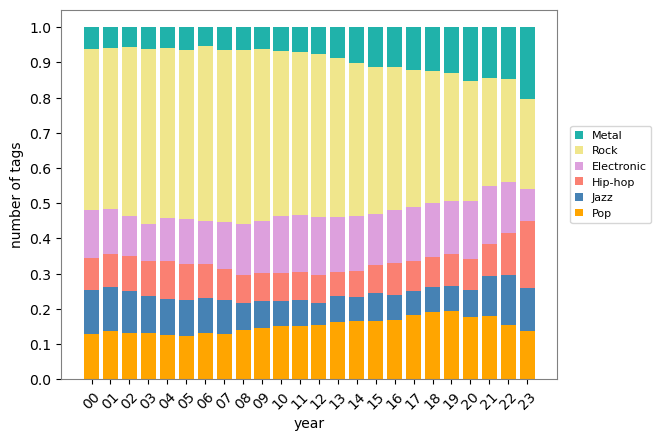

In [4]:
import matplotlib.pyplot as plt  
import numpy as np  


years = range(2000, 2024)
ind = np.arange(len(years))
jazz = []
pop = []
metal = []
hiphop = []
electronic = []
rock = []
sum_tag = []


# 使用循环遍历每一年的数据并将其添加到列表中
for year in range(2000, 2024):
    # 使用 globals() 函数获取对应的变量
    data = globals()[f'total_jazz_{year}_df']
    jazz.append(data)
    sum_tag.append(data)
    
    data = globals()[f'total_pop_{year}_df']
    pop.append(data)
    sum_tag[year-2000] = sum_tag[year-2000]+data

    data = globals()[f'total_electronic_{year}_df']
    electronic.append(data)
    sum_tag[year-2000] = sum_tag[year-2000]+data

    data = globals()[f'total_metal_{year}_df']
    metal.append(data)
    sum_tag[year-2000] = sum_tag[year-2000]+data
    
    data = globals()[f'total_hiphop_{year}_df']
    hiphop.append(data) 
    sum_tag[year-2000] = sum_tag[year-2000]+data

    data = globals()[f'total_rock_{year}_df']
    rock.append(data)
    sum_tag[year-2000] = sum_tag[year-2000]+data

jazz = np.divide(jazz, sum_tag)
pop = np.divide(pop, sum_tag)
hiphop = np.divide(hiphop, sum_tag)
rock = np.divide(rock, sum_tag)
metal = np.divide(metal, sum_tag)
electronic = np.divide(electronic, sum_tag)
        
    
p1 = plt.bar(ind, pop, color='orange')
p2 = plt.bar(ind, jazz, bottom=pop,color='steelblue')
p3 = plt.bar(ind, hiphop, bottom=np.add(pop, jazz),color='salmon')
p4 = plt.bar(ind, electronic, bottom=np.add(pop, np.add(jazz, hiphop)),color='plum')
p5 = plt.bar(ind, rock, bottom=np.add(pop, np.add(jazz, np.add(hiphop, electronic))),color='khaki')
p6 = plt.bar(ind, metal, bottom=np.add(pop, np.add(jazz, np.add(hiphop, np.add(electronic, rock)))),color='lightseagreen')


plt.ylabel('number of tags')
plt.xlabel('year')
plt.xticks(ind, ('00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23',),rotation=45)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend((p6[0], p5[0], p4[0], p3[0], p2[0], p1[0]),
           ('Metal', 'Rock', 'Electronic', 'Hip-hop', 'Jazz', 'Pop'),fontsize=8,loc='upper right', bbox_to_anchor=(1.2, 0.7),handlelength=0.7)
ax = plt.gca()

# 设置坐标轴边框的颜色为灰色
ax.spines['top'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')
ax.spines['right'].set_color('gray')

plt.show()

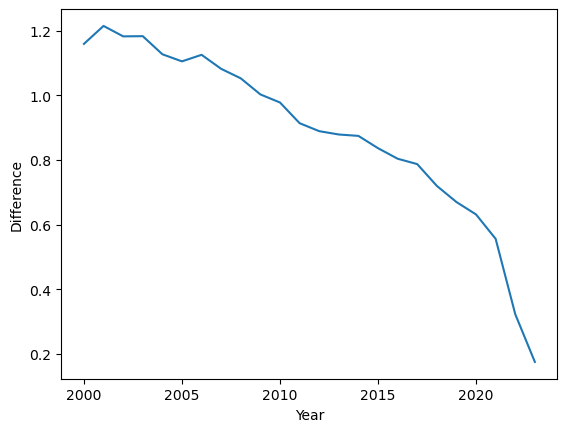

In [10]:
data = pd.read_csv('release_group_count_firstyear_2000.csv')

release_group_count = data['count']

diff = np.divide(sum_tag,release_group_count)
diff_data = pd.DataFrame({'year': data['first_release_year'], 'diff': diff})
# 绘制折线图
plt.plot(diff_data['year'], diff_data['diff'])
plt.xlabel('Year')
plt.ylabel('Difference')



plt.show()